# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [89]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [75]:
# 텐서플로의 keras 패키지를 입포트하고 패션 MNIST 다운로드후 훈련/테스트 데이터 구분
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [76]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [77]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


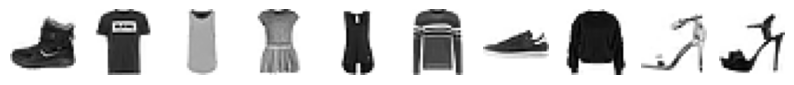

In [78]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

#### 티셔츠: 0 / 바지: 1 / 스퉤터  : 2 / 드레스: 3 / 코트:4
#### 샌달  : 5 / 셔츠: 6 / 스니커즈: 7 / 가방  : 8 / 잉클부츠 : 9

In [79]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [80]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [15]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
print(train_scaled.shape)

(60000, 784)


In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


## 인공신경망

### 텐서플로와 케라스

In [81]:
import tensorflow as tf


In [82]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [84]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [48000, 60000]

In [30]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [31]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [32]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model = keras.Sequential([dense])

## 인공신경망으로 패션 아이템 분류하기

In [34]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [36]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8537 - loss: 0.4337


In [37]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]